<a href="https://colab.research.google.com/github/SaifuddinGsohan/Crop-Diseases-Detection/blob/main/Crop%20Plant%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop Detection

####Group Name : Tech Giant

                  NAME                      ID            
              S. M. Sohan               173-15-10446      
              Md. Monsakib Rahman       173-15-10436       


##Requirement

###Install

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 36kB/s 


In [ ]:
!nvidia-smi

Fri Jun 11 14:16:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###Import

In [3]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from glob import glob

In [5]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import h5py
from PIL import Image

##Data Analysis

###Rearrange images

In [6]:
current_dir = os.getcwd()
HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/content/drive/Shareddrives/FP(DIU)/Tech Giant/Crop diseases Detection/Data/Plant'


####Define Data File

In [50]:
PATH = '/content/drive/Shareddrives/FP(DIU)/Tech Giant/Crop diseases Detection/Data'
Item = '/Plant/Apple'
Fname ='/Cedar apple rust'
Rname ='/Cedarapplerust'

####Rename Data

#####train

In [51]:
g = glob(PATH + Item + '/train' + Fname + '/*.JPG')
indx = 0
for ind, filename in enumerate(g):
    try:
        os.rename(filename, PATH + Item + '/train' + Fname + Rname + '{0}.jpg'.format(ind))
        indx += 1
    except OSError as e:
        print("Something is wrong!!",e)
print(indx)

2240


In [52]:
g = glob(PATH + Item + '/train' + Fname + '/*.jpg')
indx = 0
for ind, filename in enumerate(g):
    try:
        os.rename(filename, PATH + Item + '/train' + Fname + Rname + '{0}.jpg'.format(ind))
        indx += 1
    except OSError as e:
        print("Something is wrong!!",e)
print(indx)

2317


In [53]:
g = glob(PATH + Item + '/train' + Fname + '/*.PNG')
indx = 0
for ind, filename in enumerate(g):
    try:
        os.rename(filename, PATH + Item + '/train' + Fname + Rname + '{0}.png'.format(indx+ind))
        indx += 1
    except OSError as e:
        print("Something is wrong!!",e)
print(indx)

0


In [54]:
g = glob(PATH + Item + '/train' + Fname + '/*.png')
indx = 0
for ind, filename in enumerate(g):
    try:
        os.rename(filename, PATH + Item + '/train' + Fname + Rname + '{0}.png'.format(indx+ind))
        indx += 1
    except OSError as e:
        print("Something is wrong!!",e)
print(indx)

0


#####valid

In [55]:
g = glob(PATH + Item + '/valid' + Fname + '/*.JPG')
indx = 0
for ind, filename in enumerate(g):
    try:
        os.rename(filename, PATH + Item + '/valid' + Fname + Rname + '{0}.jpg'.format(ind))
        indx += 1
    except OSError as e:
        print("Something is wrong!!",e)
print(indx)

239


In [56]:
g = glob(PATH + Item + '/valid' + Fname + '/*.jpg')
indx = 0
for ind, filename in enumerate(g):
    try:
        os.rename(filename, PATH + Item + '/valid' + Fname + Rname + '{0}.jpg'.format(ind))
        indx += 1
    except OSError as e:
        print("Something is wrong!!",e)
print(indx)

250


In [57]:
g = glob(PATH + Item + '/valid' + Fname + '/*.PNG')
indx = 0
for ind, filename in enumerate(g):
    try:
        os.rename(filename, PATH + Item + '/valid' + Fname + Rname + '{0}.png'.format(indx+ind))
        indx += 1
    except OSError as e:
        print("Something is wrong!!",e)
print(indx)

0


In [58]:
g = glob(PATH + Item + '/valid' + Fname + '/*.png')
indx = 0
for ind, filename in enumerate(g):
    try:
        os.rename(filename, PATH + Item + '/valid' + Fname + Rname + '{0}.png'.format(indx+ind))
        indx += 1
    except OSError as e:
        print("Something is wrong!!",e)
print(indx)

0


###Data Checking

In [ ]:
img_width, img_height = 150, 150
train_data_dir = '/content/drive/Shareddrives/FP(DIU)/Tech Giant/Crop diseases Detection/Data/Plant/Apple/train'
validation_data_dir = '/content/drive/Shareddrives/FP(DIU)/Tech Giant/Crop diseases Detection/Data/Plant/Apple/valid'

In [ ]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
datagen = ImageDataGenerator(rescale=1./2)
batches = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=4,
        class_mode='binary')

Found 13124 images belonging to 4 classes.


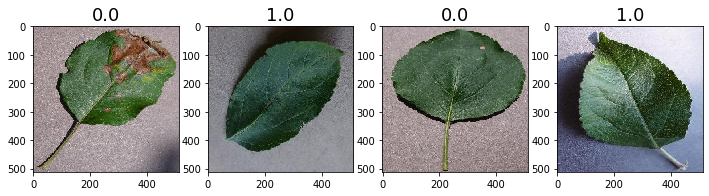

In [ ]:
imgs,labels = next(batches)
plots(imgs, titles=labels)

##Data Preparation

###Generating Data

In [ ]:
img_width, img_height = 512, 512
train_data_dir = '/content/drive/Shareddrives/FP(DIU)/Tech Giant/Crop diseases Detection/Data/Plant/Apple/train'
validation_data_dir = '/content/drive/Shareddrives/FP(DIU)/Tech Giant/Crop diseases Detection/Data/Plant/Apple/valid'

In [ ]:
datagen = ImageDataGenerator(rescale=1./2)
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=8,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=8,
        class_mode='binary')

Found 13124 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


###Model Creation

####Model v1

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

####Model v2

In [ ]:
model = Sequential()

model.add(Convolution2D(16, (3, 3), padding='same', input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Convolution2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Convolution2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(.25))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

###Model Training

####Adam

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

####RMSprop

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#### Model Fit

In [ ]:
nb_epoch = 10
nb_train_samples = 48
nb_val_samples = 16

In [ ]:
model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples,
                    epochs=nb_epoch, 
                    validation_data=validation_generator, 
                    validation_steps=nb_val_samples)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
48/48 [==============================] - 258s 5s/step - loss: -653912.6952 - accuracy: 0.2786 - val_loss: -84771744.0000 - val_accuracy: 0.2750
Epoch 2/10
48/48 [==============================] - 208s 4s/step - loss: -645520096.7347 - accuracy: 0.3568
Epoch 3/10
48/48 [==============================] - 205s 4s/step - loss: -50627311668.2449 - accuracy: 0.3678
Epoch 4/10
48/48 [==============================] - 186s 4s/step - loss: -1035667098895.6735 - accuracy: 0.2951
Epoch 5/10
48/48 [==============================] - 177s 4s/step - loss: -13570370035879.1836 - accuracy: 0.3600
Epoch 6/10
48/48 [==============================] - 177s 4s/step - loss: -90829098870909.3906 - accuracy: 0.3125
Epoch 7/10
48/48 [==============================] - 171s 3s/step - loss: -451025906969035.7500 - accuracy: 0.3454
Epoch 8/10
48/48 [==============================] - 165s 3s/step - loss: -1482390215343793.7500 - accuracy: 0.3960
Epoch 9/10
48/48 [==============================] - 165s 3s/

In [ ]:
model.save_weights('/content/drive/Shareddrives/FP(DIU)/Tech Giant/Crop diseases Detection/CSE412 Pj')

In [ ]:
model.evaluate_generator(validation_generator, nb_val_samples)

###Augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1./2,        # normalize pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,       # randomly applies shearing transformation
    zoom_range=0.2,        # randomly applies shearing transformation
    fill_mode='nearest',
    horizontal_flip=True)  # randomly flip the images

In [ ]:
img = load_img('/content/drive/Shareddrives/FP(DIU)/Tech Giant/Crop diseases Detection/CSE412 Pj/Data/train/Banana/Banana_5.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train_datagen_augmented.flow(x, batch_size=1):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [ ]:
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=8,
        class_mode='binary')

In [ ]:
model.fit_generator(train_generator_augmented,
                    steps_per_epoch=nb_train_samples,
                    epochs=nb_epoch, 
                    validation_data=validation_generator, 
                    validation_steps=nb_val_samples)

In [ ]:
model.save_weights('/content/drive/Shareddrives/FP(DIU)/Tech Giant/Crop diseases Detection/CSE412 Pj')

In [ ]:
model.evaluate_generator(validation_generator, nb_val_samples)

In [ ]:
model_vgg = Sequential()
model_vgg.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height,3)))
model_vgg.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(64, (3, 3), activation='relu', name='conv1_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(128, (3, 3), activation='relu', name='conv2_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(128, (3, 3), activation='relu', name='conv2_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, (3, 3), activation='relu', name='conv3_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, (3, 3), activation='relu', name='conv4_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, (3, 3), activation='relu', name='conv5_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

###Load VGG16 weights

In [ ]:
f = h5py.File('models/vgg16_weights.h5')
for k in range(f.attrs['nb_layers']):
    if k >= len(model_vgg.layers) - 1:
        # we don't look at the last two layers in the savefile (fully-connected and activation)
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    layer = model_vgg.layers[k]

    if layer.__class__.__name__ in ['Convolution1D', 'Convolution2D', 'Convolution3D', 'AtrousConvolution2D']:
        weights[0] = np.transpose(weights[0], (2, 3, 1, 0))

    layer.set_weights(weights)

f.close()

In [ ]:
train_generator_bottleneck = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode=None,
        shuffle=False)

validation_generator_bottleneck = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode=None,
        shuffle=False)

In [ ]:
bottleneck_features_train = model_vgg.predict_generator(train_generator_bottleneck, nb_train_samples)
np.save(open('models/bottleneck_features_train.npy', 'wb'), bottleneck_features_train)

In [ ]:
bottleneck_features_validation = model_vgg.predict_generator(validation_generator_bottleneck, nb_validation_samples)
np.save(open('models/bottleneck_features_validation.npy', 'wb'), bottleneck_features_validation)

In [ ]:
train_data = np.load(open('models/bottleneck_features_train.npy', 'rb'))
# image numbers have to be even, otherwise occur error
train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

validation_data = np.load(open('models/bottleneck_features_validation.npy', 'rb'))
validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

In [ ]:
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.5))
model_top.add(Dense(1, activation='sigmoid'))

model_top.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
nb_epoch=20
model_top.fit(train_data, train_labels,
          nb_epoch=nb_epoch, batch_size=16,
          validation_data=(validation_data, validation_labels))

###Fine-tuning the top layers of a a pre-trained network

In [ ]:
model_vgg = Sequential()
model_vgg.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height,3)))
model_vgg.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model_vgg.add(ZeroPadding2D((1, 1)))
model_vgg.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

In [ ]:
f = h5py.File('models/vgg16_weights.h5')
for k in range(f.attrs['nb_layers']):
    if k >= len(model_vgg.layers) - 1:
        # we don't look at the last two layers in the savefile (fully-connected and activation)
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    layer = model_vgg.layers[k]

    if layer.__class__.__name__ in ['Convolution1D', 'Convolution2D', 'Convolution3D', 'AtrousConvolution2D']:
        weights[0] = np.transpose(weights[0], (2, 3, 1, 0))

    layer.set_weights(weights)

f.close()

In [ ]:
top_model = Sequential()
top_model.add(Flatten(input_shape=model_vgg.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

top_model.load_weights('models/bottleneck_20_epochs.h5')

model_vgg.add(top_model)

In [ ]:
for layer in model_vgg.layers[:25]:
    layer.trainable = False

In [ ]:
# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model_vgg.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=16,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=16,
        class_mode='binary')

In [ ]:
# fine-tune the model
model_vgg.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=10,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

In [ ]:
model_vgg.evaluate_generator(validation_generator, nb_validation_samples)

###Summary

In [ ]:
imgs = ImageDataGenerator()

batches = imgs.flow_from_directory(
        'data/test/',
        target_size=(img_width, img_height),
        shuffle=False,
        batch_size=4,
        class_mode=None)

In [ ]:
filenames = batches.filenames
filenames

In [ ]:
probs = model.predict_generator(batches, batches.nb_sample)
probs

In [ ]:
plots([image.load_img('data/test/' + filenames[i]) for i in range(8)], figsize=(16,6), rows=2, titles=probs)